# Simple Word Histogram with the Command Line

Let's create a simple word histogram of Tom Sawyer (we just downloaded it).

In [1]:
!sed '1000,1020!d' tomsawyer.txt

drenched garments by the light of a tallow dip, Sid woke up; but if he
had any dim idea of making any "references to allusions," he thought
better of it and held his peace, for there was danger in Tom's eye.

Tom turned in without the added vexation of prayers, and Sid made
mental note of the omission.
_____________________________________________________

-44-

Chapter IV

THE sun rose upon a tranquil world, and beamed down upon the
peaceful village like a benediction. Breakfast over, Aunt Polly had
family worship: it began with a prayer built from the ground up of
solid courses of Scriptural quotations, welded together with a thin
mortar of originality; and from the summit of this she delivered a grim
chapter of the Mosaic Law, as from Sinai.

Then Tom girded up his loins, so to speak, and went to work to "get
his verses." Sid had learned his lesson days before. Tom bent all his


Here's the "traditional" approach.
We tokenize by replacing spaces with newlines.

In [31]:
!tr ' ' '\n' < tomsawyer.txt > tokens
!sed 20q tokens

The
Adventures
of
Tom
Sawyer
Mark
Twain
Harper
and
Brothers
New
York
and
London
1903

Author's
National
Edition:
The


Now we sort, the use the `uniq -c` command to count, finally reverse sort by numerical count (`sort -rn`).

In [32]:
!tr ' ' '\n' < tomsawyer.txt | sort | uniq -c | sort -rn > hist
!sed 30q hist

   3329 the
   2946 and
   2416 
   1739 a
   1682 to
   1435 of
   1124 was
    878 in
    865 he
    847 --
    790 that
    770 his
    659 I
    658 it
    631 with
    571 you
    511 had
    493 for
    438 Tom
    408 they
    404 but
    366 as
    360 The
    320 on
    317 at
    312 _____________________________________________________
    312 He
    292 she
    285 him
    279 be


We probably don't want to distinguish between upper and lower case, so...

In [30]:
!tr 'A-Z' 'a-z' < tomsawyer.txt | tr ' ' '\n' | sort | uniq -c | sort -rn > hist
!sed 30q hist

   3696 the
   3063 and
   2416 
   1807 a
   1686 to
   1439 of
   1177 he
   1128 was
    908 in
    847 --
    813 that
    813 his
    766 it
    659 i
    634 with
    625 you
    564 but
    544 they
    511 had
    501 for
    443 tom
    389 as
    371 she
    357 at
    321 on
    312 _____________________________________________________
    286 him
    286 all
    280 so
    280 be


In fact, the above is better written using character classes.
(However, the code below still won't quite work correctly on many Linux systems for non-English languages because `tr` hasn't been updated to use Unicode yet.)

In [27]:
!tr '[:upper:]' '[:lower:]' < tomsawyer.txt | tr ' ' '\n' | sort | uniq -c | sort -rn > hist
!sed 30q hist

   3696 the
   3063 and
   2416 
   1807 a
   1686 to
   1439 of
   1177 he
   1128 was
    908 in
    847 --
    813 that
    813 his
    766 it
    659 i
    634 with
    625 you
    564 but
    544 they
    511 had
    501 for
    443 tom
    389 as
    371 she
    357 at
    321 on
    312 _____________________________________________________
    286 him
    286 all
    280 so
    280 be


There's a better way of doing the tokenization.
The `(e)grep` command allows us to output only matching strings (`-o`) instead of lines.
The regular expression `\w+` says "match anything consisting of one or more word constituent characters".
So, with that, the pipeline becomes...

In [28]:
!egrep -o '\w+' tomsawyer.txt | sort | uniq -c | sort -rn > hist
!sed 30q hist

   3335 the
   2973 and
   1794 a
   1727 to
   1444 of
   1162 was
   1130 it
   1018 I
    961 that
    925 he
    905 in
    838 s
    796 you
    772 his
    764 Tom
    675 t
    643 with
    516 for
    513 had
    462 they
    434 him
    411 but
    372 on
    371 The
    369 as
    353 said
    327 He
    322 at
    317 she
    312 _____________________________________________________


We might want to look only for words that are in the dictionary.  We can do this by using `fgrep -f dictionary`.

Note the distinction between `egrep` (for the complicated regular expression) and `fgrep` (for matching against a large dictionary).

In [29]:
!egrep -o '\w+' tomsawyer.txt | sort | uniq -c | sort -rn | fgrep -f /usr/share/dict/american-english-huge > hist
!sed 30q hist

   3335 the
   2973 and
   1794 a
   1727 to
   1444 of
   1162 was
   1130 it
   1018 I
    961 that
    925 he
    905 in
    838 s
    796 you
    772 his
    764 Tom
    675 t
    643 with
    516 for
    513 had
    462 they
    434 him
    411 but
    372 on
    371 The
    369 as
    353 said
    327 He
    322 at
    317 she
    303 up


# Hapax Legomina

Hapax Legomina are words that occur only once in a text.
Those are words with a word count of 1 in the histogram.
We can search for this directly by looking for lines that start
with whitespace, followed by 1, followed by a space (since that's
the output format of `uniq -c`).

In [43]:
!grep '^ *1 ' hist -m 30

      1 zephyr
      1 zenith
      1 zebras
      1 zeal
      1 youthful
      1 youth
      1 yourselves.
      1 yourselves
      1 yourself?
      1 yourself."
      1 yourself!"
      1 yourself!
      1 yours?
      1 yourn.
      1 yourn,
      1 yourn'll
      1 your'n,
      1 young.
      1 young,
      1 you;
      1 yonder'swhere
      1 yielding
      1 yielded,
      1 yi
      1 yesterday.
      1 yesterday,
      1 yesterday
      1 yes;
      1 yes."
      1 yes.


However, for such simple numerical operations, `awk` is a better tool.
Like `sed`, it's a simple programming language, but it operates on fields and records.
The input fields are automatically available in `$1` through `$9`.
Records are usually lines and fields are whitespace separated, but this can be changed.

In [47]:
!awk '$1==1{print}' hist | sed 30q

      1 zephyr
      1 zenith
      1 zebras
      1 zeal
      1 youthful
      1 youth
      1 yourselves.
      1 yourselves
      1 yourself?
      1 yourself."
      1 yourself!"
      1 yourself!
      1 yours?
      1 yourn.
      1 yourn,
      1 yourn'll
      1 your'n,
      1 young.
      1 young,
      1 you;
      1 yonder'swhere
      1 yielding
      1 yielded,
      1 yi
      1 yesterday.
      1 yesterday,
      1 yesterday
      1 yes;
      1 yes."
      1 yes.
awk: (FILENAME=hist FNR=5586) fatal: print to "standard output" failed (Broken pipe)


Here is a simple `awk` program to count the number of words that occur more than 10 times.

In [49]:
!awk '$1>10{frequent+=1};END{print frequent}' hist

690


Although `awk` is a full programming language, similar to Perl, for anything other than those simple 1-liners, you should probably use Python instead of `sed` or `awk`.

# Zipf's Law

Let's look now at the word frequencies.
You can do that with command line tools like `gnuplot` and `quickplot`.

In [53]:
!awk '{print $1}' hist > freq
# quickplot freq

But let's do this in Python, mostly because it's easy and you need to know it later anyway.
Let's read in the word frequencies (this is the Python equivalent of the `awk` one liner above.)

In [33]:
freq = []
with open("hist") as stream:
    for line in stream.readlines():
        f = line.split()
        freq.append(int(f[0]))

Now, plotting is easy.

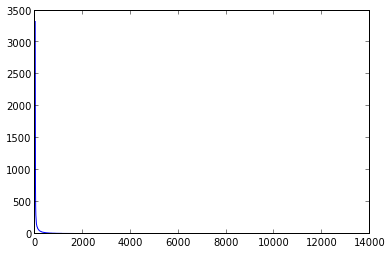

In [34]:
plot(freq)

The frequent words are very frequent!

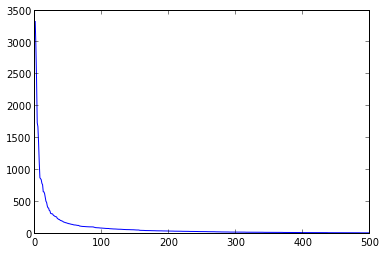

In [35]:
plot(freq[:500])

In fact, on a log-log scale, it's easier to see what's going on.

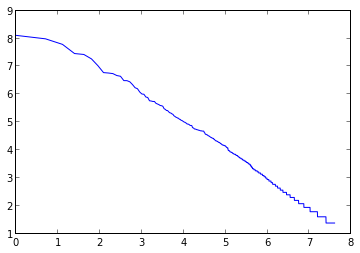

In [38]:
plot(log(1+arange(2000)),log(freq[:2000]))

This nearly linear relationship is called *Zipf's law*.
It's a "law" in the sense that it is observed frequently in many
kinds of distributions involving language.
However, there is no mathematical "law" involved requiring
word distributions to work this way.

What it says is that the log of the frequency is proportional to the log of the rank of a word.

It's an instance of a *power law*, in which a distribution takes the form

$$P(n) = \alpha n^{-\beta}$$

Note that this may only be well defined if the number of possible words $N$ is finite.

Zipf's law may be related to the fact that if we take many "reasonable" probability distributions, sample from them, and express the samples as ranks, we get something that, to first order, looks Zipfian.